In [3]:
import graph_tool.all as gt
import numpy as np

# Signed network construction with graph-tool

There are different ways to construct a network:
- adjacency matrix
- edge list
- ?

Let's consider all the possible options. First we add the nodes

In [376]:
g = gt.Graph(directed = False)

In [377]:
A = [[0,1,-1,-1,0],
     [1,0,1,-1,0],
     [-1,1,0,-1,1], 
     [-1,-1,-1,0,1],
     [0,0,1,1,0]]

In [378]:
def graph_construction(repre, repre_type = 'adj', directed = False, nodes_id = None, weights = None):
    
    if repre_type == 'adj':

        if not directed:
            A = np.triu(repre)
        else:
            A = np.array(repre)

        edge_list = np.transpose(A.nonzero())
        weights = A[A.nonzero()]

    elif repre_type == 'edgelist':
        edge_list = repre

        if not weights:
            print('please give edge weights')
    else:
        print('please choose between adj and edgelist')

    g = gt.Graph(directed = directed)
    
    g.add_edge_list(edge_list)

    #add weights as an edge propetyMap
    g.ep['weight'] = g.new_edge_property(value_type = "double", vals = weights)
    g.ep['color'] = g.new_edge_property(value_type="string", vals = ['#42BFDD' if w > 0 else '#F24333' for w in weights ])

    if nodes_id:
        # node ids
        g.vp["node_id"] = g.new_vertex_property(value_type = "string", vals = nodes_id)
    else:
        pass

    return g

In [340]:
import numpy as np
import graph_tool.all as gt

def graph_construction(repre, repre_type='adj', is_directed=False, nodes_id=None, weights=None):
    """
    Constructs a signed network from the adjacency matrix or the edge list.
    
    Parameters:
        repre (numpy.ndarray or list of tuples): The input representation of the graph.
        repre_type (str): The type of representation ('adj' for adjacency matrix, 'edgelist' for edge list).
        directed (bool): True if the graph is directed, False otherwise.
        nodes_id (list or None): The IDs of nodes in the graph.
        weights (list or None): The weights of edges in the graph.
        
    Returns:
        gt.Graph: The graph constructed from the input representation.
    """
    if repre_type == 'adj':
        # UNDIRECTED
        if not is_directed:
            A = np.triu(repre)  # Convert the input adjacency matrix to upper triangular to avoid duplicate edges

        # DIRECTED    
        else:
            A = np.array(repre)

        edge_list = np.transpose(A.nonzero())  # Get the edgelist from the adjacency matrix
        weights = A[A.nonzero()]  # Get the non-zero elements as edge weights

    elif repre_type == 'edgelist':
        edge_list = repre

        if not weights:
            print('Please provide edge weights')  
    else:
        print('Please choose between adj and edgelist')  # Invalid representation type

    g = gt.Graph(directed=is_directed)

    g.add_edge_list(edge_list)

    # Add weights and colours as an edge property map
    g.ep['weight'] = g.new_edge_property(value_type="double", vals=weights)
    g.ep['color'] = g.new_edge_property(value_type="string", vals=['#42BFDD' if w > 0 else '#F24333' for w in weights])

    if nodes_id:
        # Node IDs
        g.vp["node_id"] = g.new_vertex_property(value_type="string", vals=nodes_id)
    else:
        print('warning: no node IDs assigned')
        pass 

    return g



In [416]:
pwd

'/Users/Cande007/Library/CloudStorage/OneDrive-UniversiteitUtrecht/Documents/Projects/signet_gt'

In [410]:
import numpy as np
import graph_tool.all as gt

class SignedNetwork:
    def __init__(self):
        self.nodes = None
        self.edges = None
        self.graph = None

    def graph_construction(self, repre, repre_type='adj', is_directed=False, nodes_id=None, weights=None):
        """
        Constructs a signed network from the adjacency matrix or the edge list.

        Parameters:
            repre (numpy.ndarray or list of tuples): The input representation of the graph.
            repre_type (str): The type of representation ('adj' for adjacency matrix, 'edgelist' for edge list).
            is_directed (bool): True if the graph is directed, False otherwise.
            nodes_id (list or None): The IDs of nodes in the graph.
            weights (list or None): The weights of edges in the graph.

        Returns:
            gt.Graph: The graph constructed from the input representation.
        """
        if repre_type == 'adj':
            # UNDIRECTED
            if not is_directed:
                A = np.triu(repre)  # Convert the input adjacency matrix to upper triangular to avoid duplicate edges

            # DIRECTED    
            else:
                A = np.array(repre)

            edge_list = np.transpose(A.nonzero())  # Get the edgelist from the adjacency matrix
            weights = A[A.nonzero()]  # Get the non-zero elements as edge weights

        elif repre_type == 'edgelist':
            edge_list = repre

            if not weights:
                raise ValueError('Please provide edge weights')  # Raise an exception for missing edge weights

        else:
            raise ValueError('Please choose between adj and edgelist')  # Raise an exception for an invalid representation type

        self.edges = edge_list

        # Construct the graph
        self.graph = gt.Graph(directed=is_directed)
        self.graph.add_edge_list(edge_list)

        # Add weights and colours as an edge property map
        self.graph.ep['weight'] = self.graph.new_edge_property(value_type="double", vals=weights)
        self.graph.ep['color'] = self.graph.new_edge_property(value_type="string", vals=['#42BFDD' if w > 0 else '#F24333' for w in weights])

        if nodes_id:
            # Node IDs
            self.graph.vp["node_id"] = self.graph.new_vertex_property(value_type="string", vals=nodes_id)
            self.nodes = nodes_id
        else:
            print('warning: no node IDs assigned, default indexes are used')
            self.graph.vp["node_id"] = self.graph.new_vertex_property(value_type="string", vals=self.graph.get_vertices())
            self.nodes = self.graph.get_vertices()

        return self.graph


In [411]:
g.get_

AttributeError: 'Graph' object has no attribute 'get_'

In [412]:
# Example usage:
graph_builder = SignedNetwork()

nodes = ['1', '2', '3']

# Example 1: Create graph from adjacency matrix
adj_matrix = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
constructed_graph = graph_builder.graph_construction(adj_matrix, repre_type='adj', is_directed=False)

# Example 2: Create graph from edge list
edge_list = [(0, 1), (1, 2), (2, 0)]
edge_weights = [1, -1, 1]
#constructed_graph = graph_builder.graph_construction(edge_list, repre_type='edgelist', is_directed=False, weights=edge_weights)

In [413]:
list(g.vp.node_id)

['0', '1', '2']

In [414]:
list(graph_builder.nodes)

[0, 1, 2]

In [422]:
import signet_gt

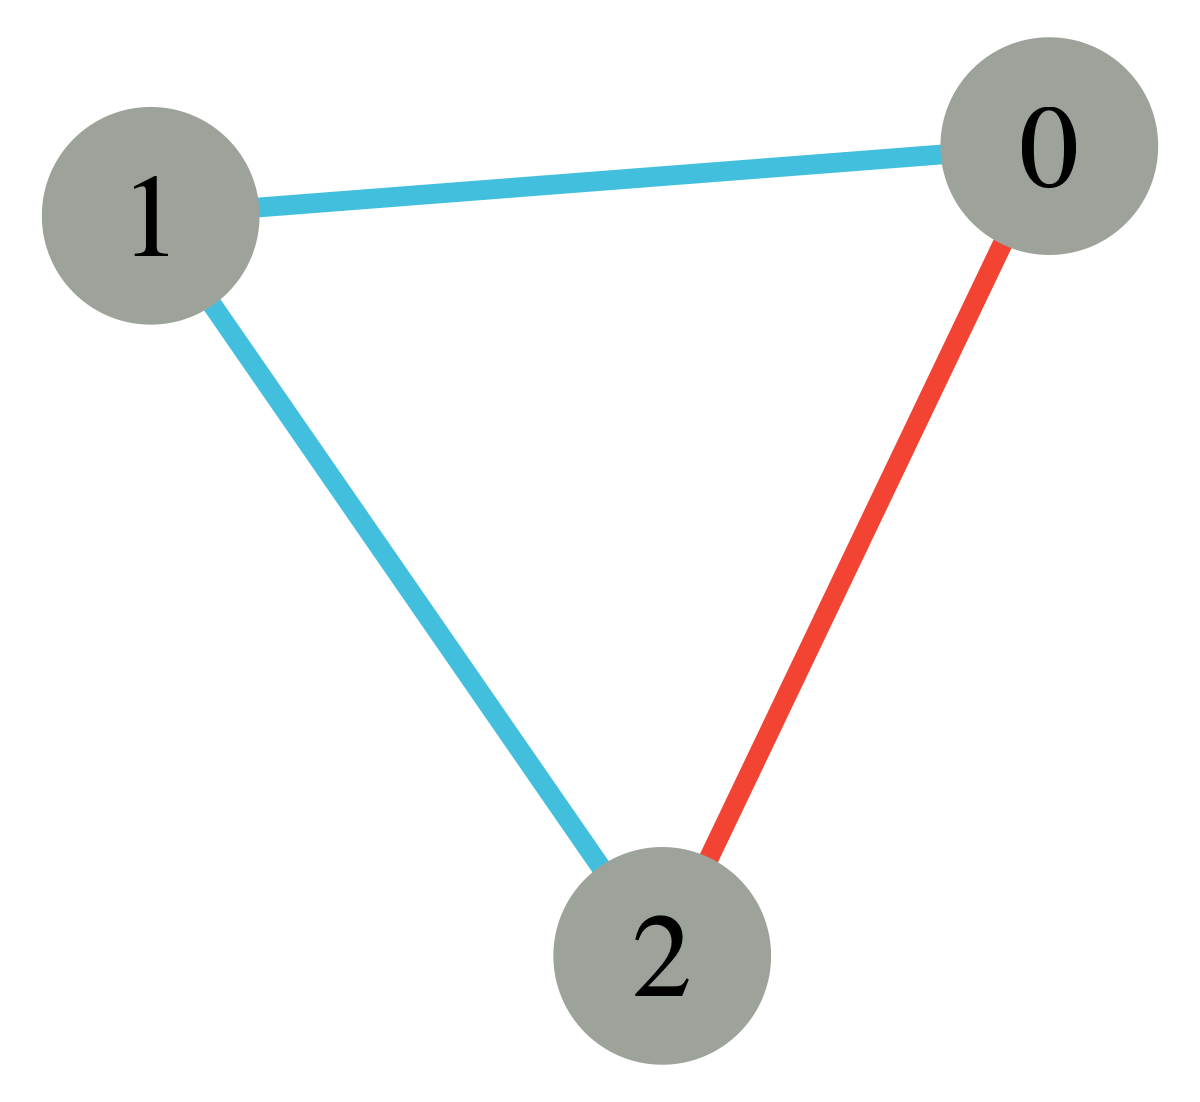

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x168560cd0, at 0x16858f710>

In [421]:
g = graph_builder.graph
gt.graph_draw(g,
              vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

In [352]:
network.

[(0, 1), (1, 2)]

In [341]:
np.transpose(np.triu(np.array(A)).nonzero())

array([[0, 1],
       [0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [2, 3],
       [2, 4],
       [3, 4]])

In [342]:
edgelist = np.transpose(np.triu(np.array(A)).nonzero())
weights = [1 for i in range(len(edgelist))]

In [375]:
g.vp.node_id

AttributeError: 'super' object has no attribute 'node_id'

In [379]:
g = graph_construction(repre = edgelist, 
                       #nodes_id = ['a','b','c','d','e'], 
                       repre_type = 'edgelist',
                       weights = weights,
                       is_directed = False)
gt.graph_draw(g, 
              #vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

TypeError: graph_construction() got an unexpected keyword argument 'is_directed'

In [258]:
# we have three nodes and these are their names
nodes = ['a', 'b', 'c']

# this is the adjacency matrix
A = np.array([[0, 1, -1],
              [1, 0, -1],
              [-1, -1, 0]])

ug_A = np.triu(A)
# in any case you need to have an edge list instead
edge_list = np.transpose(ug_A.nonzero())

# BUT the edge list does not account the weights!
weights = ug_A[ug_A.nonzero()]



In [259]:
nodes

['a', 'b', 'c']

In [260]:
g.add_edge_list(edge_list )

#add weights as an edge propetyMap
g.ep['weight'] = g.new_edge_property(value_type = "double", vals = weights)

In [267]:
# node properties that can be useful

g.vp["node_id"] = g.new_vertex_property(value_type = "string", vals = nodes)

g.ep['color'] = g.new_edge_property(value_type="string", vals = ['#42BFDD' if w > 0 else '#F24333' for w in weights ])

g.list_properties()

node_id        (vertex)  (type: string)
color          (edge)    (type: string)
weight         (edge)    (type: double)


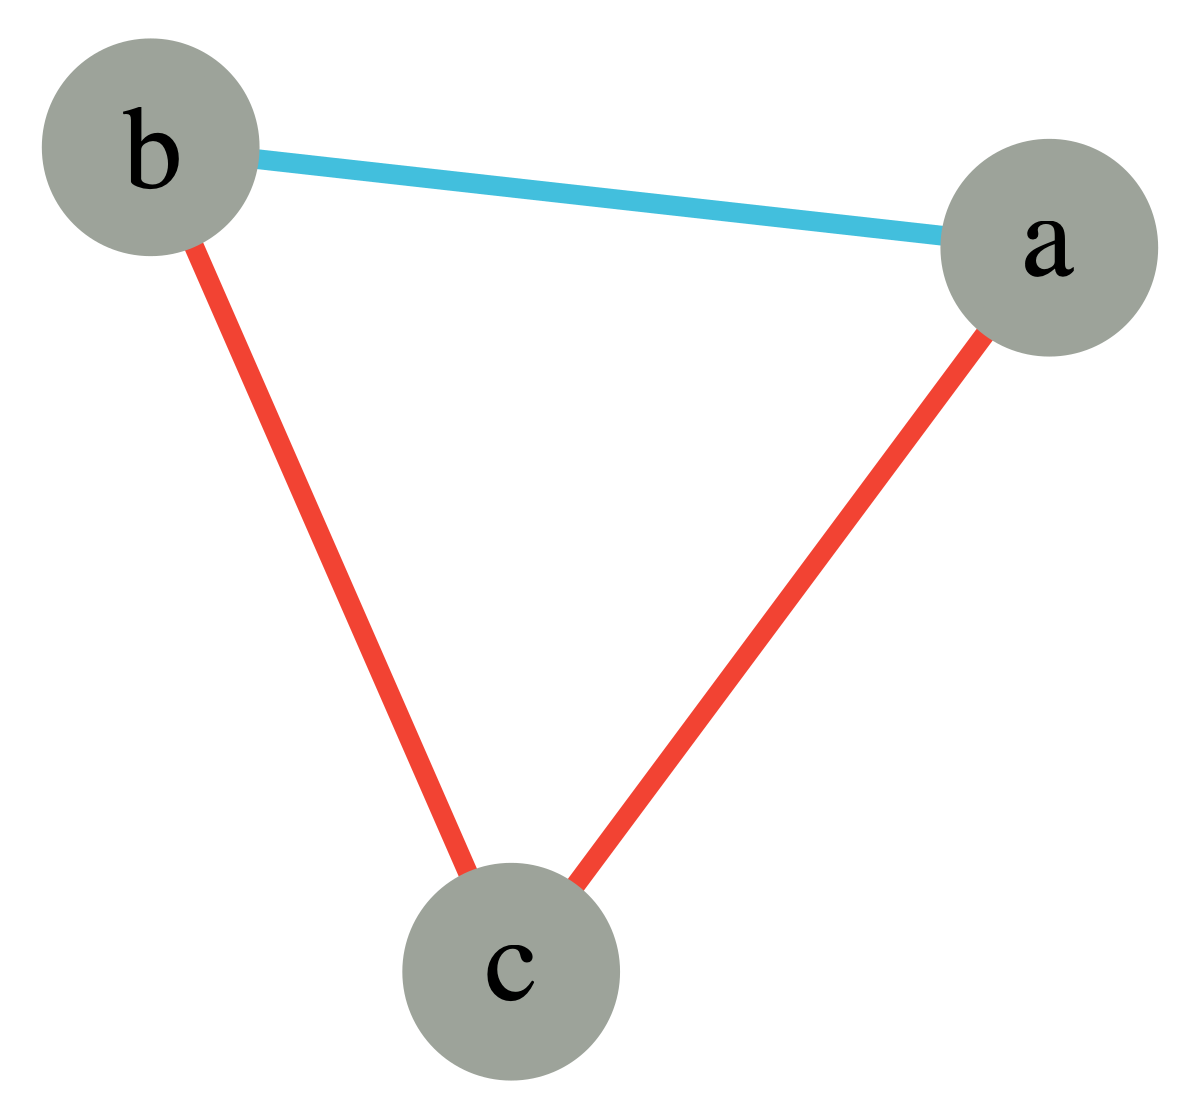

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x160387490, at 0x1604b36d0>

In [282]:
gt.graph_draw(g, vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

In [243]:
print(list(g.vp.node_id))
print(list(g.ep.weight))

['a', 'b', 'c']
[1.0, -1.0, -1.0]


In [244]:
for v in g.vertices():
    print(g.vp.node_id[v])

a
b
c


In [245]:
gt.adjacency(g, weight = g.ep.weight).todense()

matrix([[ 0.,  1., -1.],
        [ 1.,  0., -1.],
        [-1., -1.,  0.]])

In [92]:
def to_graph_tool(adj):
    g = gt.Graph(directed=False)
    edge_weights = g.new_edge_property('double')
    g.edge_properties['weight'] = edge_weights
    nnz = np.nonzero(np.triu(adj,1))
    nedges = len(nnz[0])
    g.add_edge_list(np.hstack([np.transpose(nnz),np.reshape(adj[nnz],(nedges,1))]),eprops=[edge_weights])
    return g

In [93]:
x = to_graph_tool(A)
gt.adjacency(x, weight = x.ep.weight).todense()

matrix([[ 0.,  1., -1.],
        [ 1.,  0., -1.],
        [-1., -1.,  0.]])

In [ ]:
g = gt.Graph(directed=True)
adj = np.random.randint(-1, 2, (10, 10))
g.add_edge_list(np.transpose(A.nonzero()))

In [23]:
A[A.nonzero()]

array([ 1, -1,  1])

In [20]:
A

array([[ 0,  1,  0],
       [ 0,  0, -1],
       [ 0,  1,  0]])

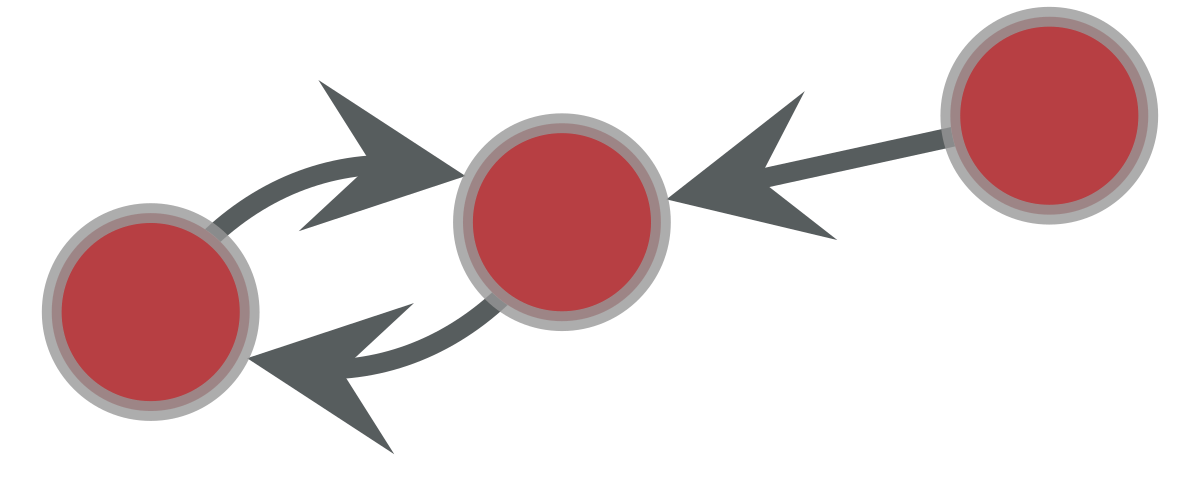

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14b6ce290, at 0x14b6c7a50>

In [16]:
gt.graph_draw(g)

In [ ]:
import numpy as np
import graph_tool.all as gt

class SignedNetworkGraph:
    def __init__(self):
        self.graph = None

    def graph_construction(self, repre, repre_type='adj', is_directed=False, nodes_id=None, weights=None):
        """
        Constructs a signed network from the adjacency matrix or the edge list.
        
        Parameters:
            repre (numpy.ndarray or list of tuples): The input representation of the graph.
            repre_type (str): The type of representation ('adj' for adjacency matrix, 'edgelist' for edge list).
            directed (bool): True if the graph is directed, False otherwise.
            nodes_id (list or None): The IDs of nodes in the graph.
            weights (list or None): The weights of edges in the graph.
            
        Returns:
            gt.Graph: The graph constructed from the input representation.
        """
        if repre_type == 'adj':
            # UNDIRECTED
            if not is_directed:
                A = np.triu(repre)  # Convert the input adjacency matrix to upper triangular to avoid duplicate edges

            # DIRECTED
            else:
                A = np.array(repre)

            edge_list = np.transpose(A.nonzero())  # Get the edgelist from the adjacency matrix
            weights = A[A.nonzero()]  # Get the non-zero elements as edge weights

        elif repre_type == 'edgelist':
            edge_list = repre

            if not weights:
                raise ValueError('Please provide edge weights')  # Raise an exception for missing edge weights
        else:
            raise ValueError('Invalid representation type: please choose between adj and edgelist')  # Invalid representation type

        self.graph = gt.Graph(directed=is_directed)
        self.graph.add_edge_list(edge_list)

        # Add weights and colours as an edge property map
        self.graph.ep['weight'] = self.graph.new_edge_property(value_type="double", vals=weights)
        self.graph.ep['color'] = self.graph.new_edge_property(value_type="string", vals=['#42BFDD' if w > 0 else '#F24333' for w in weights])

        if nodes_id:
            # Node IDs
            self.graph.vp["node_id"] = self.graph.new_vertex_property(value_type="string", vals=nodes_id)
        else:
            print('warning: no node IDs assigned')

        return self.graph
